[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harikiran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harikiran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Model: SVM
Accuracy: 0.98
Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix: 
[[962   3]
 [ 21 129]]

Model: Logistic Regression
Accuracy: 0.95
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       965
           1       0.95      0.65      0.77       150

    accuracy                           0.95      1115
   macro avg       0.95      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115

Confusion Matrix: 
[[960   5]
 [ 53  97]]

Model: Naive Bayes
Accuracy: 0.96
Classification Report: 
              precision    recall  f1-score   support

           0       0.96      1.

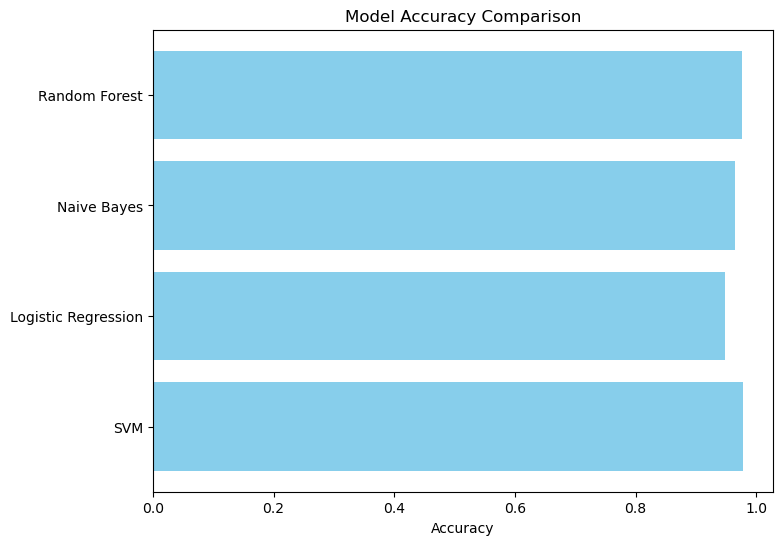

✅ Best Model: SVM with accuracy: 0.98
The SVM model is the best for this task as it has the highest accuracy.
✅ SVM Model and Vectorizer Saved!


In [ ]:
import pandas as pd  
import pickle  
import string  
import nltk  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer  
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression  
from sklearn.naive_bayes import MultinomialNB  
from sklearn.ensemble import RandomForestClassifier  
import matplotlib.pyplot as plt  

nltk.download('stopwords')  
nltk.download('punkt')  

df = pd.read_csv("spam.csv", encoding="latin-1")  
df = df[['v1', 'v2']]  
df.columns = ['label', 'text']  
df['label'] = df['label'].map({'ham': 0, 'spam': 1})  

ps = PorterStemmer()  

def preprocess_text(text):  
    text = text.lower()  
    text = nltk.word_tokenize(text)  
    text = [word for word in text if word.isalnum()]  
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]  
    text = [ps.stem(word) for word in text]  
    return " ".join(text)  

df['text'] = df['text'].apply(preprocess_text)  

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)  

vectorizer = TfidfVectorizer()  
X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)  


models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(random_state=42)
}


model_results = {}

for model_name, model in models.items():
    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    confusion = confusion_matrix(y_test, y_pred)
    
    model_results[model_name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': confusion
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Classification Report: \n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix: \n{confusion}\n")

model_names = list(model_results.keys())
accuracies = [model_results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(8, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

best_model_name = max(model_results, key=lambda model: model_results[model]['accuracy'])
best_model_accuracy = model_results[best_model_name]['accuracy']
print(f"✅ Best Model: {best_model_name} with accuracy: {best_model_accuracy:.2f}")
print(f"The {best_model_name} model is the best for this task as it has the highest accuracy.")

best_model = models[best_model_name]
with open(f"{best_model_name}_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print(f"✅ {best_model_name} Model and Vectorizer Saved!")
